# SBRC Microgrid Peak Shaving Plots

Notebook for obtaining distribution network sensitivities fro  SBRC microgrid via linear regression

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandapower as pp
import os

In [206]:
date = '2020-11-16'

In [207]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Dist Network Simulations')

In [208]:
sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
matplotlib.rcParams['font.family'] = 'Abyssinica SIL'

### Import SBRC network data

In [209]:
# eco_drh = pd.read_csv('Results/Ecomode_20min_DRH_3-11-2020_7am_6pm.csv', index_col=0)
# eco_ifh = pd.read_csv('Results/Ecomode_20min_IFH_3-11-2020_7am_6pm.csv', index_col=0)
# eco_sb1 = pd.read_csv('Results/Ecomode_20min_SBRC_P1_3-11-2020_7am_6pm.csv', index_col=0)
# eco_sb2 = pd.read_csv('Results/Ecomode_20min_SBRC_P2_3-11-2020_7am_6pm.csv', index_col=0)
# eco_sb3 = pd.read_csv('Results/Ecomode_20min_SBRC_P3_3-11-2020_7am_6pm.csv', index_col=0)

In [210]:
# eco = pd.DataFrame(index=eco_drh.index[0:72])
# eco['DR_Pa'] = eco_drh['p_im'] + eco_drh['p_ex']
# eco['IF_Pc'] = eco_ifh['p_im'] + eco_ifh['p_ex']
# eco['SB_Pa'] = eco_sb1['p_im'] + eco_sb1['p_ex']
# eco['SB_Pb'] = eco_sb2['p_im'] + eco_sb2['p_ex']
# eco['SB_Pc'] = eco_sb3['p_im'] + eco_sb3['p_ex']
# eco.index = pd.to_datetime((eco.index), format='%Y/%m/%d %H:%M:%S')
# eco = eco.resample('5min').interpolate('linear')

In [211]:
rbc_drh = pd.read_csv(f'Results/RBC_20min_DRH_{date}.csv', index_col=0)
# rbc_drh['pv'] = rbc_drh['pv'].shift(-3, axis=0)
rbc_ifh = pd.read_csv(f'Results/RBC_20min_IFH_{date}.csv', index_col=0)
rbc_sb1 = pd.read_csv(f'Results/RBC_20min_SBRC_P1_{date}.csv', index_col=0)
rbc_sb2 = pd.read_csv(f'Results/RBC_20min_SBRC_P2_{date}.csv', index_col=0)
rbc_sb3 = pd.read_csv(f'Results/RBC_20min_SBRC_P3_{date}.csv', index_col=0)

In [212]:
rbc_drh.index = pd.to_datetime((rbc_drh.index), format='%Y/%m/%d %H:%M:%S')
rbc_ifh.index = pd.to_datetime((rbc_ifh.index), format='%Y/%m/%d %H:%M:%S')
rbc_sb1.index = pd.to_datetime((rbc_sb1.index), format='%Y/%m/%d %H:%M:%S')
rbc_sb2.index = pd.to_datetime((rbc_sb2.index), format='%Y/%m/%d %H:%M:%S')
rbc_sb3.index = pd.to_datetime((rbc_sb3.index), format='%Y/%m/%d %H:%M:%S')

In [260]:
rbc = pd.DataFrame(index=rbc_drh.index[0:72])
rbc['DR_Pa'] = rbc_drh['p_im'] + rbc_drh['p_ex']
rbc['IF_Pc'] = rbc_ifh['p_im'] + rbc_ifh['p_ex']
rbc['SB_Pa'] = rbc_sb1['p_im'] + rbc_sb1['p_ex']
rbc['SB_Pb'] = rbc_sb2['p_im'] + rbc_sb2['p_ex']
rbc['SB_Pc'] = rbc_sb3['p_im'] + rbc_sb3['p_ex']
rbc['Ptot'] = rbc['DR_Pa']+rbc['IF_Pc']+rbc['SB_Pa']+rbc['SB_Pb']+rbc['SB_Pc']
rbc.index = pd.to_datetime((rbc.index), format='%Y/%m/%d %H:%M:%S')
#rbc = rbc.resample('5min').interpolate('linear')

In [214]:
vr_drh = pd.read_csv(f'Results/PSmode_20min_DRH_{date}_3pm_5pm.csv', index_col=0)
vr_ifh = pd.read_csv(f'Results/PSmode_20min_IFH_{date}_3pm_5pm.csv', index_col=0)
vr_sb1 = pd.read_csv(f'Results/PSmode_20min_SBRC_P1_{date}_3pm_5pm.csv', index_col=0)
vr_sb2 = pd.read_csv(f'Results/PSmode_20min_SBRC_P2_{date}_3pm_5pm.csv', index_col=0)
vr_sb3 = pd.read_csv(f'Results/PSmode_20min_SBRC_P3_{date}_3pm_5pm.csv', index_col=0)

In [215]:
vr_drh.index = pd.to_datetime((vr_drh.index), format='%Y/%m/%d %H:%M:%S')
vr_ifh.index = pd.to_datetime((vr_ifh.index), format='%Y/%m/%d %H:%M:%S')
vr_sb1.index = pd.to_datetime((vr_sb1.index), format='%Y/%m/%d %H:%M:%S')
vr_sb2.index = pd.to_datetime((vr_sb2.index), format='%Y/%m/%d %H:%M:%S')
vr_sb3.index = pd.to_datetime((vr_sb3.index), format='%Y/%m/%d %H:%M:%S')

In [261]:
vr = pd.DataFrame(index=vr_drh.index[0:72])
vr['DR_Pa'] = vr_drh['p_im'] + vr_drh['p_ex']
vr['IF_Pc'] = vr_ifh['p_im'] + vr_ifh['p_ex']
vr['SB_Pa'] = vr_sb1['p_im'] + vr_sb1['p_ex']
vr['SB_Pb'] = vr_sb2['p_im'] + vr_sb2['p_ex']
vr['SB_Pc'] = vr_sb3['p_im'] + vr_sb3['p_ex']
vr['Ptot'] = vr['DR_Pa']+vr['IF_Pc']+vr['SB_Pa']+vr['SB_Pb']+vr['SB_Pc']
vr.index = pd.to_datetime((vr.index), format='%Y/%m/%d %H:%M:%S')
#vr = vr.resample('5min').interpolate('linear')

In [217]:
kiosk = pd.read_csv('CSV/Camp East Kiosk - Hioki PW3198 30sec 20201019 to 20201123 with n.CSV')
kiosk.index = pd.to_datetime((kiosk['Date']+' '+kiosk['Time']), format='%Y/%m/%d %H:%M:%S')
kiosk = kiosk.resample('5min').mean()

In [218]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Time Series Plots')

In [219]:
def plot_measured_actual(volts_before, volts_after, bus_volts):
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time')
    ax1.set_ylabel('kW')
    #ax1.set_ylim(-7,11)
#ax1.plot(volts_df.index, mg.loc[sim_date][bus_volts], linewidth=1, label='MEASURED')
#     ax1.plot(volts_df.index, mg.loc[sim_date]['TX_Va'], linewidth=1, label='MEASURED')
#     ax1.plot(volts_df.index, mg.loc[sim_date]['SB_Va'], linewidth=1, label='MEASURED')
    ax1.plot(volts_before.index, volts_before[bus_volts], color='blue', linewidth=1, label='Before')
    ax1.plot(volts_after.index, volts_after[bus_volts], color='Red', linewidth=1, label='After')
    ax1.legend(loc="upper left")
    ax1.grid()
    fig.set_figheight(6)
    fig.set_figwidth(9)
    plt.show()

In [220]:
def plot_sdhouses_measured_actual(volts_before, volts_after):
    
    fig, ax = plt.subplots(2, sharex=True)
    
    ax[0].set_ylabel('Voltage (Ph-A)')
    ax[0].set_ylim(240,254)
    ax[0].set_xlim(volts_before.index[0],volts_before.index[-1])
    ax[0].plot(volts_before.index, volts_before['DR_Va'], color='blue')
    ax[0].plot(volts_after.index, volts_after['DR_Va'], color='black',ls='--')
    ax[0].legend(['DRH Measured Va', 'DRH Simulated Va'], loc="upper left", ncol=2)
    
    ax[1].set_ylabel('Voltage (Ph-B)')
    ax[1].set_ylim(240,254)
    ax[0].set_xlim(volts_before.index[0],volts_before.index[-1])
    ax[1].plot(volts_before.index, volts_before['IF_Vc'], color='orange')
    ax[1].plot(volts_after.index, volts_after['IF_Vc'], color='black',ls='--')
    ax[1].legend(['IFH Measured Vc', 'IFH Simulated Vc'], loc="upper left", ncol=2)
    
    
    fig.tight_layout()
    fig.set_figheight(8)
    fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()
    
    #plt.savefig('Figures/sd_house_pandapower_voltages.pdf')
    ax[0].autoscale(enable=True, axis='x', tight=True)
    ax[1].autoscale(enable=True, axis='x', tight=True)
    plt.show()

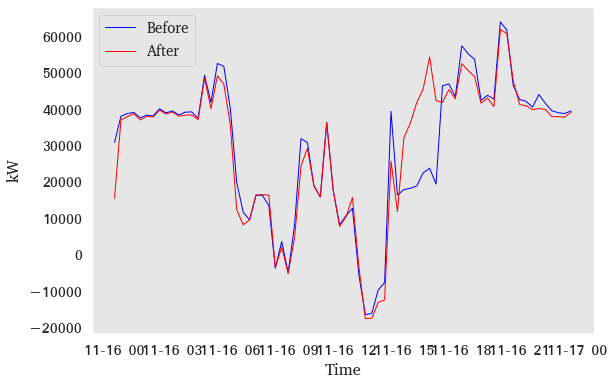

In [221]:
plot_measured_actual(vr, rbc, 'Ptot')

In [222]:
#volts_after = time_series_powerflow(scale=1.02)

In [223]:
#plot_measured_actual(volts_before, bus_volts='DR_Va')

## Plot gross load and PV data

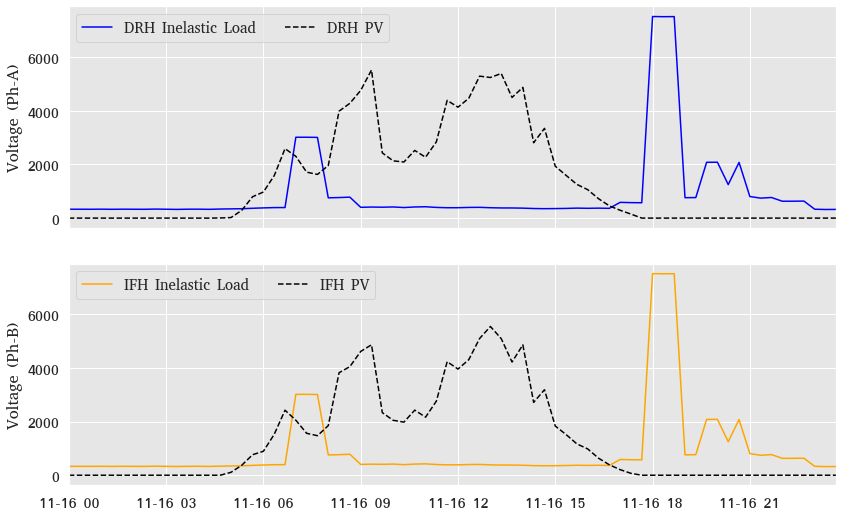

In [224]:
fig, ax = plt.subplots(2, sharex=True)

drh = rbc_drh.loc[date].copy()
ifh = rbc_ifh.loc[date].copy()

ax[0].set_ylabel('Voltage (Ph-A)')
#ax[0].set_ylim(240,254)
ax[0].set_xlim(drh.index[0],drh.index[-1])
ax[0].plot(drh.index, drh['load'], color='blue')
ax[0].plot(drh.index, vr_drh.loc[date]['pv'], color='black',ls='--')
ax[0].legend(['DRH Inelastic Load', 'DRH PV'], loc="upper left", ncol=2)

ax[1].set_ylabel('Voltage (Ph-B)')
#ax[1].set_ylim(240,254)
ax[0].set_xlim(ifh.index[0],ifh.index[-1])
ax[1].plot(ifh.index, ifh['load'], color='orange')
ax[1].plot(ifh.index, ifh['pv'], color='black',ls='--')
ax[1].legend(['IFH Inelastic Load', 'IFH PV'], loc="upper left", ncol=2)


fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()

#plt.savefig('Figures/sd_house_pandapower_voltages.pdf')
ax[0].autoscale(enable=True, axis='x', tight=True)
ax[1].autoscale(enable=True, axis='x', tight=True)
plt.show()

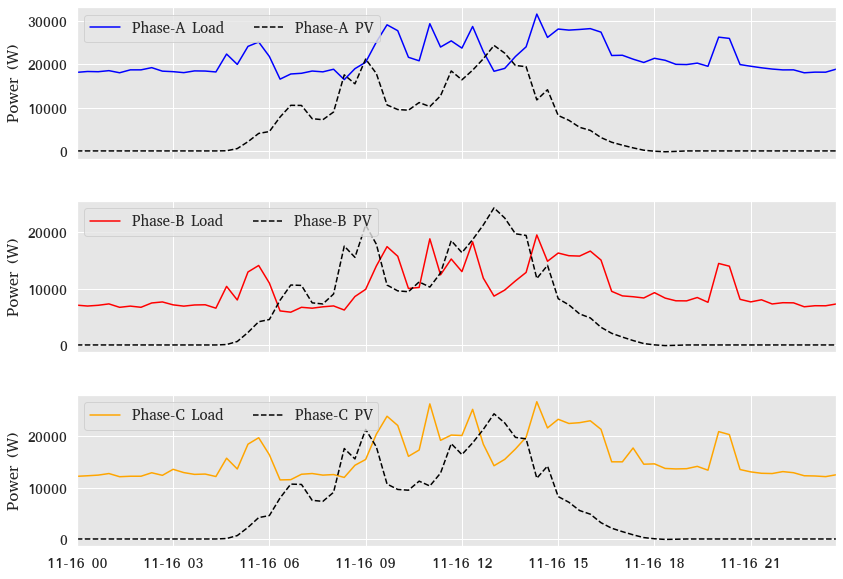

In [225]:
fig, ax = plt.subplots(3, sharex=True)

sb1 = rbc_sb1.loc[date].copy()
sb2 = rbc_sb2.loc[date].copy()
sb3 = rbc_sb3.loc[date].copy()

ax[0].set_ylabel('Power (W)')
ax[0].set_xlim(sb1.index[0],sb1.index[-1])
ax[0].plot(sb1.index,sb1['load'], color='blue')
ax[0].plot(sb1.index, sb1['pv'], color='black',ls='--')
ax[0].legend(['Phase-A Load', 'Phase-A PV'], loc="upper left", ncol=2)

ax[1].set_ylabel('Power (W)')
ax[1].set_xlim(sb1.index[0],sb1.index[-1])
ax[1].plot(sb1.index,sb2['load'], color='red')
ax[1].plot(sb1.index, sb2['pv'], color='black',ls='--')
ax[1].legend(['Phase-B Load', 'Phase-B PV'], loc="upper left", ncol=2)

ax[2].set_ylabel('Power (W)')
ax[2].set_xlim(sb1.index[0],sb1.index[-1])
ax[2].plot(sb1.index,sb3['load'], color='orange')
ax[2].plot(sb1.index, sb3['pv'], color='black',ls='--')
ax[2].legend(['Phase-C Load', 'Phase-C PV'], loc="upper left", ncol=2)

fig.tight_layout()
fig.set_figheight(9)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()

#plt.savefig('Figures/sbrc_pandapower_voltages.pdf')
ax[0].autoscale(enable=True, axis='x', tight=True)
ax[1].autoscale(enable=True, axis='x', tight=True)
plt.show()
    

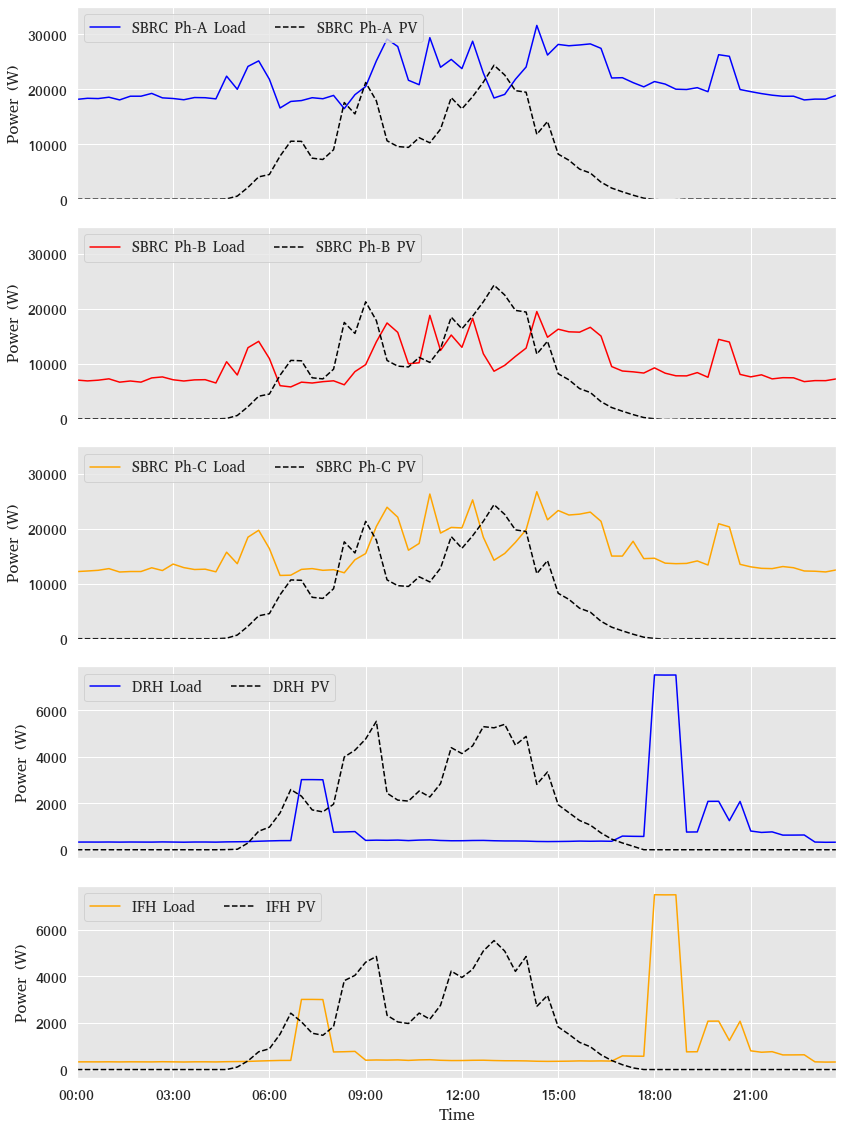

In [226]:
fig, ax = plt.subplots(5, sharex=True)

for x in ax:
    x.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))

sb1 = rbc_sb1.loc[date].copy()
sb2 = rbc_sb2.loc[date].copy()
sb3 = rbc_sb3.loc[date].copy()

drh = rbc_drh.loc[date].copy()
ifh = rbc_ifh.loc[date].copy()


ax[0].set_ylabel('Power (W)')
ax[0].set_ylim(0,35000)
ax[0].set_xlim(sb1.index[0],sb1.index[-1])
ax[0].plot(sb1.index,sb1['load'], color='blue')
ax[0].plot(sb1.index, sb1['pv'], color='black',ls='--')
ax[0].legend(['SBRC Ph-A Load', 'SBRC Ph-A PV'], loc="upper left", ncol=2)

ax[1].set_ylabel('Power (W)')
ax[1].set_ylim(0,35000)
ax[1].set_xlim(sb1.index[0],sb1.index[-1])
ax[1].plot(sb1.index,sb2['load'], color='red')
ax[1].plot(sb1.index, sb2['pv'], color='black',ls='--')
ax[1].legend(['SBRC Ph-B Load', 'SBRC Ph-B PV'], loc="upper left", ncol=2)

ax[2].set_ylabel('Power (W)')
ax[2].set_ylim(0,35000)
ax[2].set_xlim(sb1.index[0],sb1.index[-1])
ax[2].plot(sb1.index,sb3['load'], color='orange')
ax[2].plot(sb1.index, sb3['pv'], color='black',ls='--')
ax[2].legend(['SBRC Ph-C Load', 'SBRC Ph-C PV'], loc="upper left", ncol=2)


ax[3].set_ylabel('Power (W)')
#ax[0].set_ylim(240,254)
ax[3].set_xlim(drh.index[0],drh.index[-1])
ax[3].plot(drh.index, drh['load'], color='blue')
ax[3].plot(drh.index, vr_drh.loc[date]['pv'], color='black',ls='--')
ax[3].legend(['DRH Load', 'DRH PV'], loc="upper left", ncol=2)

ax[4].set_ylabel('Power (W)')
ax[4].set_xlabel('Time')
#ax[1].set_ylim(240,254)
ax[4].set_xlim(ifh.index[0],ifh.index[-1])
ax[4].plot(ifh.index, ifh['load'], color='orange')
ax[4].plot(ifh.index, ifh['pv'], color='black',ls='--')
ax[4].legend(['IFH Load', 'IFH PV'], loc="upper left", ncol=2)


fig.tight_layout()
fig.set_figheight(16)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()
fig.tight_layout()
plt.savefig('Figures/sbrc_mg_loads_ps.pdf')
ax[0].autoscale(enable=True, axis='x', tight=True)
ax[1].autoscale(enable=True, axis='x', tight=True)

plt.show()
    

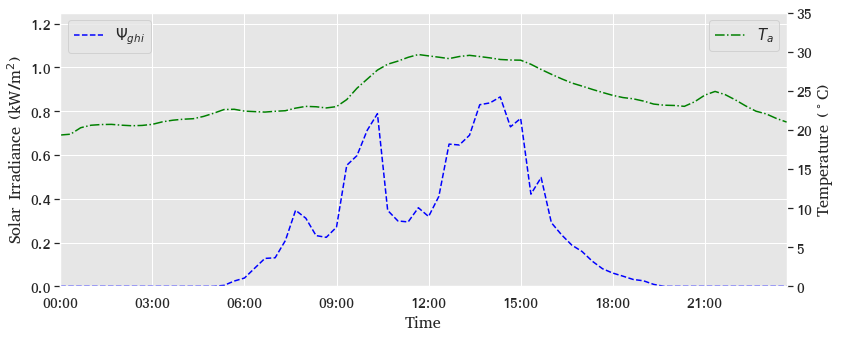

In [227]:
df_thermal = rbc_drh.loc[date].copy()


fig, ax1 = plt.subplots()
ax1.set_xlabel('Time')

ax1.set_ylabel('Solar Irradiance (kW/m$^2$)')
ax1.set_ylim(-0,1.25)
ax1.plot(df_thermal.index, df_thermal['ghi']/1000, label='Power', lw=1.5, color='blue', linestyle='--')
#ax1.plot(df_thermal['time_'], df_electrical['power_3'], label='Temp Bed', lw=3, color='g')
ax1.legend(['$\Psi_{ghi}$', '$\Phi_h$'], loc="upper left")
ax1.set_xlim([df_thermal.index[0], df_thermal.index[-1:][0]])

ax2 = ax1.twinx()
ax2.set_ylabel('Temperature ($^\circ$C)')
ax2.set_ylim(0,35)
#ax2.plot(df_thermal.index, df_thermal['t_av'], label='Temp Bed', lw=2, color='black')
ax2.plot(df_thermal.index, df_thermal['t_ext'], label='Temp Bed', lw=1.5, color='green',  linestyle='-.')
# ax2.plot(df_thermal['time_'], df_thermal['t_std'], label='Temp Bed', lw=3)
# ax2.plot(df_thermal['time_'], df_thermal['t_liv'], label='Temp Bed', lw=3)
# ax2.plot(df_thermal['time_'], df_thermal['t_din'], label='Temp Ext', lw=3)
ax2.legend(['$T_a$'])
ax2.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))

fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
ax2.grid()
plt.savefig(f'Figures/sbrc_mg_ps_simdata_weather.pdf', bbox_inches='tight')
plt.show()

In [228]:
df_thermal['t_ext'].min()

19.35626708967

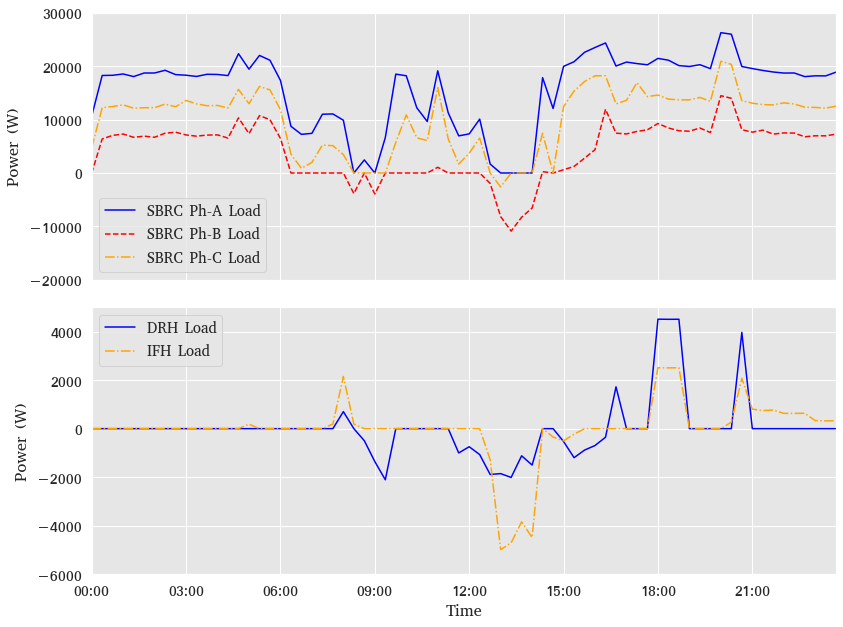

In [229]:
fig, ax = plt.subplots(2, sharex=True)

for x in ax:
    x.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))

sb1 = rbc_sb1.loc[date].copy()
sb2 = rbc_sb2.loc[date].copy()
sb3 = rbc_sb3.loc[date].copy()

drh = rbc_drh.loc[date].copy()
ifh = rbc_ifh.loc[date].copy()


ax[0].set_ylabel('Power (W)')
ax[0].set_xlim(sb1.index[0],sb1.index[-1])
ax[0].set_ylim(-20000,30000)
ax[0].plot(sb1.index,sb1['p_im']+sb1['p_ex'], color='blue')
ax[0].plot(sb1.index,sb2['p_im']+sb2['p_ex'], color='red', ls='--')
ax[0].plot(sb1.index,sb3['p_im']+sb3['p_ex'], color='orange', ls='-.')
# ax[0].plot(sb1.index, sb1['pv'], color='black',ls='--')
ax[0].legend(['SBRC Ph-A Load', 'SBRC Ph-B Load', 'SBRC Ph-C Load'], loc="lower left", ncol=1)

ax[1].set_ylabel('Power (W)')
ax[1].set_xlabel('Time')
ax[1].set_xlim(sb1.index[0],sb1.index[-1])
ax[1].set_ylim(-6000,5000)
ax[1].plot(drh.index, drh['p_im']+ drh['p_ex'], color='blue')
ax[1].plot(ifh.index, ifh['p_im']+ ifh['p_ex'], color='orange',  ls='-.')
#ax[1].plot(sb1.index,sb2['p_im']+sb2['p_ex'], color='red')
#ax[1].plot(sb1.index, sb2['pv'], color='black',ls='--')
ax[1].legend(['DRH Load', 'IFH Load'], loc="upper left", ncol=1)



fig.set_figheight(9)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()
ax[0].autoscale(enable=True, axis='x', tight=True)
ax[1].autoscale(enable=True, axis='x', tight=True)
fig.tight_layout()
plt.savefig('Figures/rbc_net_load_ps.pdf')
plt.show()
    

In [230]:
print((sb1['p_im']+sb1['p_ex']).iloc[45:51].max())
print((sb2['p_im']+sb2['p_ex']).iloc[45:51].max())
print((sb3['p_im']+sb3['p_ex']).iloc[45:51].max())
print((drh['p_im']+drh['p_ex']).iloc[45:51].max())
print((ifh['p_im']+ifh['p_ex']).iloc[45:51].max())

24354.391666666666
11941.5
18202.85
1722.5200381244629
0.0


In [231]:
print(((sb1['p_im']+sb1['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((sb2['p_im']+sb2['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((sb3['p_im']+sb3['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((drh['p_im']+drh['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((ifh['p_im']+ifh['p_ex']).iloc[45:51].sum()*(1/3))/1000)

43.76479444444445
9.458916666666665
31.417571982310346
-0.6440926033000224
-0.24343199075516106


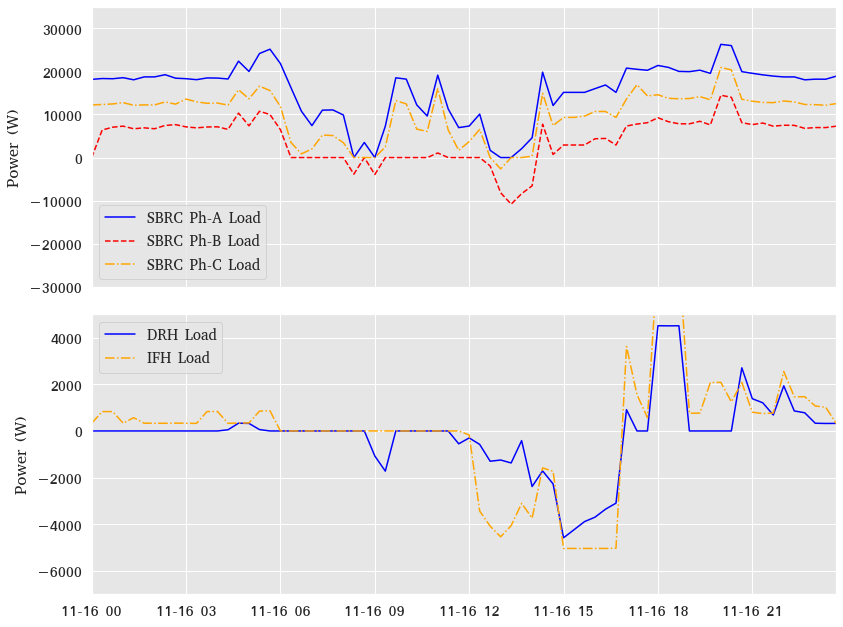

In [232]:
fig, ax = plt.subplots(2, sharex=True)

sb1 = vr_sb1.loc[date].copy()
sb2 = vr_sb2.loc[date].copy()
sb3 = vr_sb3.loc[date].copy()

drh = vr_drh.loc[date].copy()
ifh = vr_ifh.loc[date].copy()


ax[0].set_ylabel('Power (W)')
ax[0].set_xlim(sb1.index[0],sb1.index[-1])
ax[0].set_ylim(-30000,35000)
ax[0].plot(sb1.index,sb1['p_im']+sb1['p_ex'], color='blue')
ax[0].plot(sb1.index,sb2['p_im']+sb2['p_ex'], color='red', ls='--')
ax[0].plot(sb1.index,sb3['p_im']+sb3['p_ex'], color='orange', ls='-.')
# ax[0].plot(sb1.index, sb1['pv'], color='black',ls='--')
ax[0].legend(['SBRC Ph-A Load', 'SBRC Ph-B Load', 'SBRC Ph-C Load'], loc="lower left", ncol=1)

ax[1].set_ylabel('Power (W)')
ax[1].set_xlim(sb1.index[0],sb1.index[-1])
ax[1].set_ylim(-7000,5000)
ax[1].plot(drh.index, drh['p_im']+ drh['p_ex'], color='blue')
ax[1].plot(ifh.index, ifh['p_im']+ ifh['p_ex'], color='orange',  ls='-.')
#ax[1].plot(sb1.index,sb2['p_im']+sb2['p_ex'], color='red')
#ax[1].plot(sb1.index, sb2['pv'], color='black',ls='--')
ax[1].legend(['DRH Load', 'IFH Load'], loc="upper left", ncol=1)



fig.set_figheight(9)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()


ax[0].autoscale(enable=True, axis='x', tight=True)
ax[1].autoscale(enable=True, axis='x', tight=True)
fig.tight_layout()
plt.savefig('Figures/mpc_net_load.pdf')
plt.show()
    

In [233]:
print((sb1['p_im']+sb1['p_ex']).iloc[45:51].max())
print((sb2['p_im']+sb2['p_ex']).iloc[45:51].max())
print((sb3['p_im']+sb3['p_ex']).iloc[45:51].max())
print((drh['p_im']+drh['p_ex']).iloc[45:51].max())
print((ifh['p_im']+ifh['p_ex']).iloc[45:51].max())

16854.39166666667
4441.5
10702.849999999999
-3093.5
-5025.25


In [234]:
print(((sb1['p_im']+sb1['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((sb2['p_im']+sb2['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((sb3['p_im']+sb3['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((drh['p_im']+drh['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((ifh['p_im']+ifh['p_ex']).iloc[45:51].sum()*(1/3))/1000)

31.129794444444443
6.8239166666666655
19.66323333333333
-7.611083333333333
-10.067


## Net Load Profiles MPC

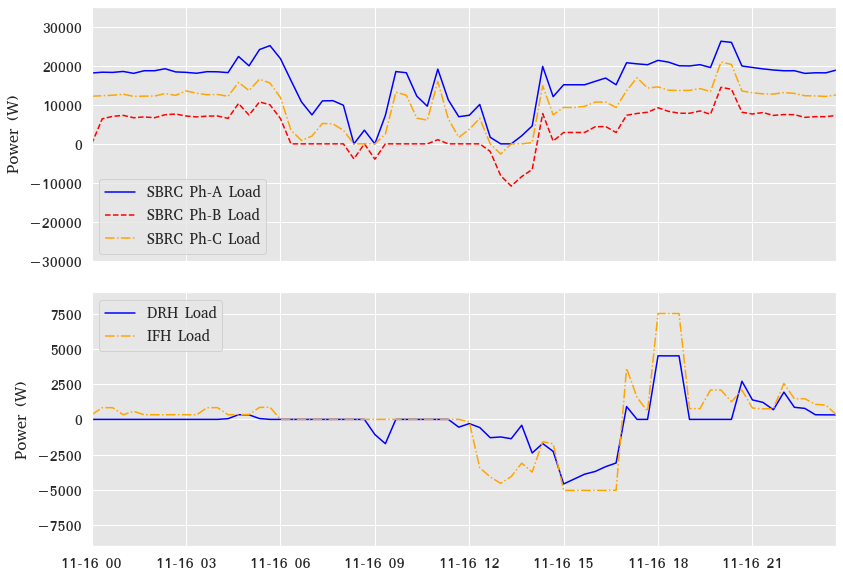

In [235]:
fig, ax = plt.subplots(2, sharex=True)

sb1 = vr_sb1.loc[date].copy()
sb2 = vr_sb2.loc[date].copy()
sb3 = vr_sb3.loc[date].copy()

drh = vr_drh.loc[date].copy()
ifh = vr_ifh.loc[date].copy()


ax[0].set_ylabel('Power (W)')
ax[0].set_xlim(sb1.index[0],sb1.index[-1])
ax[0].set_ylim(-30000,35000)
ax[0].plot(sb1.index,sb1['p_im']+sb1['p_ex'], color='blue')
ax[0].plot(sb1.index,sb2['p_im']+sb2['p_ex'], color='red', ls='--')
ax[0].plot(sb1.index,sb3['p_im']+sb3['p_ex'], color='orange', ls='-.')
# ax[0].plot(sb1.index, sb1['pv'], color='black',ls='--')
ax[0].legend(['SBRC Ph-A Load', 'SBRC Ph-B Load', 'SBRC Ph-C Load'], loc="lower left", ncol=1)

ax[1].set_ylabel('Power (W)')
ax[1].set_xlim(sb1.index[0],sb1.index[-1])
ax[1].set_ylim(-9000,9000)
ax[1].plot(drh.index, drh['p_im']+ drh['p_ex'], color='blue')
ax[1].plot(ifh.index, ifh['p_im']+ ifh['p_ex'], color='orange',  ls='-.')
#ax[1].plot(sb1.index,sb2['p_im']+sb2['p_ex'], color='red')
#ax[1].plot(sb1.index, sb2['pv'], color='black',ls='--')
ax[1].legend(['DRH Load', 'IFH Load'], loc="upper left", ncol=1)


fig.tight_layout()
fig.set_figheight(9)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()

#plt.savefig('Figures/mpc_net_load.pdf')
ax[0].autoscale(enable=True, axis='x', tight=True)
ax[1].autoscale(enable=True, axis='x', tight=True)
plt.show()

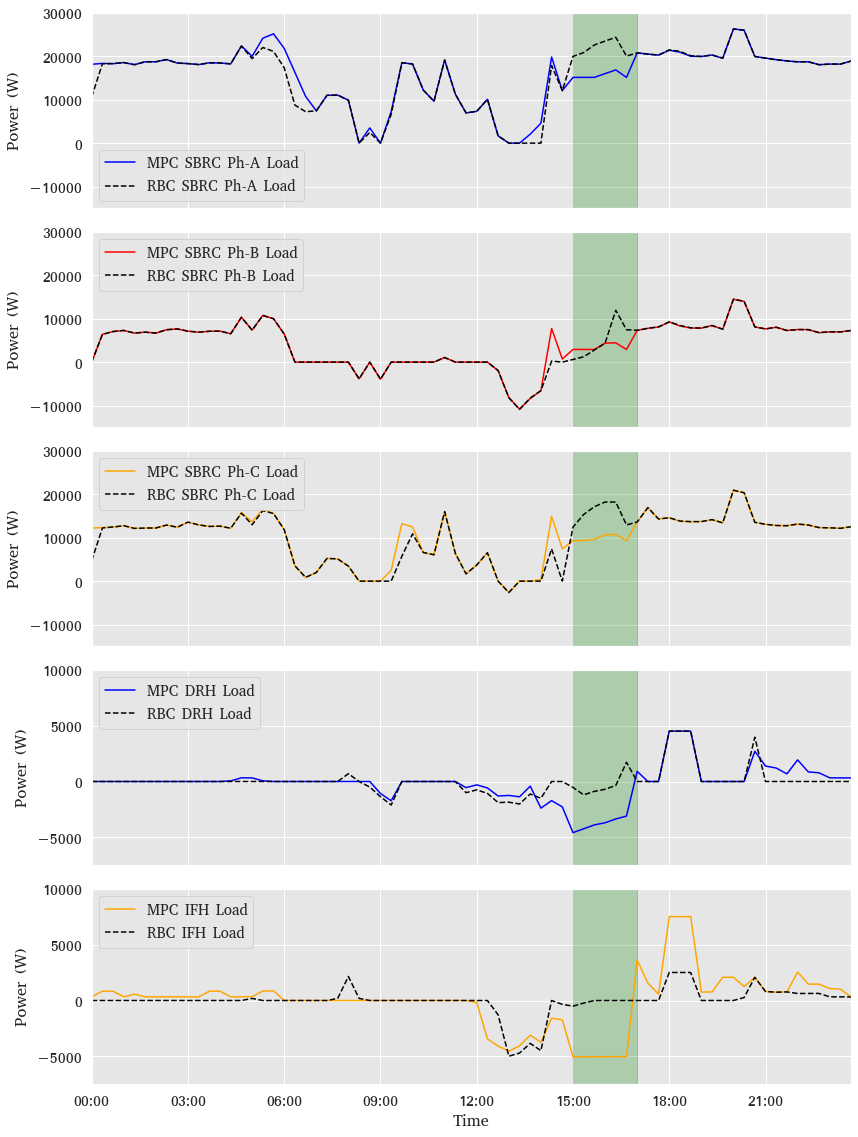

In [236]:
volts_before = rbc.copy()
volts_after = vr.copy()

fig, ax = plt.subplots(5, sharex=True)

for x in ax:
    x.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))

ax[0].set_ylabel('Power (W)')
ax[0].set_xlim(volts_before.index[0],volts_before.index[-1])
ax[0].set_ylim(-15000,30000)
ax[0].plot(volts_after.index,volts_after['SB_Pa'], color='blue')
ax[0].plot(volts_before.index,volts_before['SB_Pa'], color='black',ls='--')
ax[0].axvspan(volts_after.index[45*4], volts_after.index[51*4], alpha=0.25, color='green', label='Peak Period')
ax[0].legend(['MPC SBRC Ph-A Load','RBC SBRC Ph-A Load'], loc="lower left", ncol=1)

ax[1].set_ylabel('Power (W)')
ax[1].set_xlim(volts_before.index[0],volts_before.index[-1])
ax[1].set_ylim(-15000,30000)
ax[1].plot(volts_after.index,volts_after['SB_Pb'], color='red')
ax[1].plot(volts_before.index,volts_before['SB_Pb'], color='black',ls='--')
ax[1].axvspan(volts_after.index[45*4], volts_after.index[51*4], alpha=0.25, color='green', label='Peak Period')
ax[1].legend(['MPC SBRC Ph-B Load','RBC SBRC Ph-B Load'], loc="upper left", ncol=1)

ax[2].set_ylabel('Power (W)')
ax[2].set_xlim(volts_before.index[0],volts_before.index[-1])
ax[2].set_ylim(-15000,30000)
ax[2].plot(volts_after.index,volts_after['SB_Pc'], color='orange')
ax[2].plot(volts_before.index,volts_before['SB_Pc'], color='black',ls='--')
ax[2].axvspan(volts_after.index[45*4], volts_after.index[51*4], alpha=0.25, color='green', label='Peak Period')
ax[2].legend(['MPC SBRC Ph-C Load','RBC SBRC Ph-C Load'], loc="upper left", ncol=1)


ax[3].set_ylabel('Power (W)')
ax[3].set_xlim(volts_before.index[0],volts_before.index[-1])
ax[3].set_ylim(-7500,10000)
ax[3].plot(volts_after.index,volts_after['DR_Pa'], color='blue')
ax[3].plot(volts_before.index,volts_before['DR_Pa'], color='black',ls='--')
ax[3].axvspan(volts_after.index[45*4], volts_after.index[51*4], alpha=0.25, color='green', label='Peak Period')
ax[3].legend(['MPC DRH Load','RBC DRH Load'], loc="upper left", ncol=1)

ax[4].set_ylabel('Power (W)')
ax[4].set_xlabel('Time')
ax[4].set_ylim(-7500,10000)
ax[4].set_xlim(volts_before.index[0],volts_before.index[-1])
ax[4].plot(volts_after.index,volts_after['IF_Pc'], color='orange')
ax[4].plot(volts_before.index,volts_before['IF_Pc'], color='black',ls='--')
ax[4].axvspan(volts_after.index[45*4], volts_after.index[51*4], alpha=0.25, color='green', label='Peak Period')
ax[4].legend(['MPC IFH Load', 'RBC IFH Load'], loc="upper left", ncol=1)


fig.tight_layout()
fig.set_figheight(16)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()
ax[0].autoscale(enable=True, axis='x', tight=True)
ax[1].autoscale(enable=True, axis='x', tight=True)
fig.tight_layout()
plt.savefig('Figures/sbrc_mg_rbc_mpc_peak_comparison.pdf')
plt.show()
    

In [237]:
print((sb1['p_im']+sb1['p_ex']).iloc[45:51].max())
print((sb2['p_im']+sb2['p_ex']).iloc[45:51].max())
print((sb3['p_im']+sb3['p_ex']).iloc[45:51].max())
print((drh['p_im']+drh['p_ex']).iloc[45:51].max())
print((ifh['p_im']+ifh['p_ex']).iloc[45:51].max())

16854.39166666667
4441.5
10702.849999999999
-3093.5
-5025.25


In [238]:
print(((sb1['p_im']+sb1['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((sb2['p_im']+sb2['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((sb3['p_im']+sb3['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((drh['p_im']+drh['p_ex']).iloc[45:51].sum()*(1/3))/1000)
print(((ifh['p_im']+ifh['p_ex']).iloc[45:51].sum()*(1/3))/1000)

31.129794444444443
6.8239166666666655
19.66323333333333
-7.611083333333333
-10.067


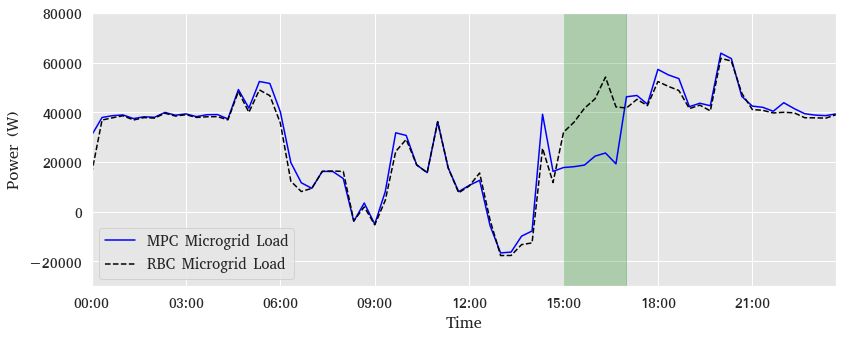

In [249]:
fig, ax = plt.subplots(1, sharex=True)


ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))

ax.set_ylabel('Power (W)')
ax.set_xlabel('Time')
ax.set_xlim(volts_before.index[0],volts_before.index[-1])
ax.set_ylim(-30000,80000)
ax.plot(vr.index,vr['Ptot'], color='blue')
ax.plot(rbc.index,rbc['Ptot'], color='black',ls='--')
ax.axvspan(volts_after.index[45*4], volts_after.index[51*4], alpha=0.25, color='green', label='Peak Period')
ax.legend(['MPC Microgrid Load','RBC Microgrid Load'], loc="lower left", ncol=1)

fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()
ax.autoscale(enable=True, axis='x', tight=True)
fig.tight_layout()
plt.savefig('Figures/sbrc_mg_total_load_comparison.pdf')
plt.show()
    

In [262]:
print(((vr['Ptot']).iloc[45:51].sum()*(1/3))/1000)

39.93886111111111


In [263]:
print(((vr['Ptot']).iloc[45:51].max()))

23605.49166666668


In [264]:
print(((rbc['Ptot']).iloc[45:51].sum()*(1/3))/1000)

83.75375849936626


In [265]:
print(((rbc['Ptot']).iloc[45:51].max()))

54140.64323778935


In [259]:
vr['Ptot'].iloc[45*4:51*4]

2020-11-16 15:00:00    17758.170833
2020-11-16 15:05:00    17844.608333
2020-11-16 15:10:00    17931.045833
2020-11-16 15:15:00    18017.483333
2020-11-16 15:20:00    18103.920833
2020-11-16 15:25:00    18266.912500
2020-11-16 15:30:00    18429.904167
2020-11-16 15:35:00    18592.895833
2020-11-16 15:40:00    18755.887500
2020-11-16 15:45:00    19652.238542
2020-11-16 15:50:00    20548.589583
2020-11-16 15:55:00    21444.940625
2020-11-16 16:00:00    22341.291667
2020-11-16 16:05:00    22657.341667
2020-11-16 16:10:00    22973.391667
2020-11-16 16:15:00    23289.441667
2020-11-16 16:20:00    23605.491667
2020-11-16 16:25:00    22517.073958
2020-11-16 16:30:00    21428.656250
2020-11-16 16:35:00    20340.238542
2020-11-16 16:40:00    19251.820833
2020-11-16 16:45:00    25995.057411
2020-11-16 16:50:00    32738.293989
2020-11-16 16:55:00    39481.530566
Freq: 5T, Name: Ptot, dtype: float64